<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/sbi_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

# New Section

In [14]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

In [15]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [16]:
# Download data from Yahoo Finance
symbol<-getSymbols("SBIN.NS",from=start_date,auto.assign=FALSE)



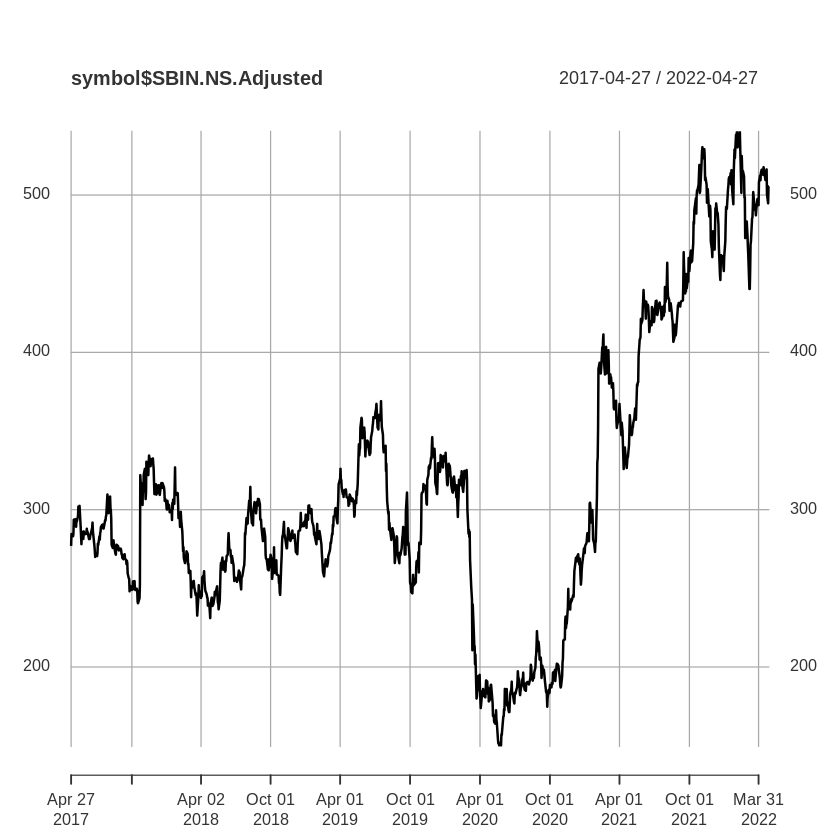

In [18]:
plot(symbol$SBIN.NS.Adjusted)

In [19]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$SBIN.NS.Volume>0,]

     Index             SBIN.NS.Open    SBIN.NS.High    SBIN.NS.Low   
 Min.   :2017-04-27   Min.   :151.9   Min.   :153.2   Min.   :149.4  
 1st Qu.:2018-07-22   1st Qu.:264.5   1st Qu.:268.4   1st Qu.:260.6  
 Median :2019-10-31   Median :296.6   Median :300.9   Median :292.7  
 Mean   :2019-10-27   Mean   :316.4   Mean   :320.7   Mean   :311.7  
 3rd Qu.:2021-01-25   3rd Qu.:354.6   3rd Qu.:359.4   3rd Qu.:349.6  
 Max.   :2022-04-27   Max.   :544.0   Max.   :549.0   Max.   :537.1  
 SBIN.NS.Close   SBIN.NS.Volume      SBIN.NS.Adjusted
 Min.   :150.8   Min.   :  2095795   Min.   :149.5   
 1st Qu.:263.5   1st Qu.: 16087361   1st Qu.:261.1   
 Median :296.4   Median : 24108386   Median :293.4   
 Mean   :316.1   Mean   : 33142623   Mean   :313.9   
 3rd Qu.:354.4   3rd Qu.: 42333709   3rd Qu.:351.2   
 Max.   :540.5   Max.   :262677081   Max.   :540.5   

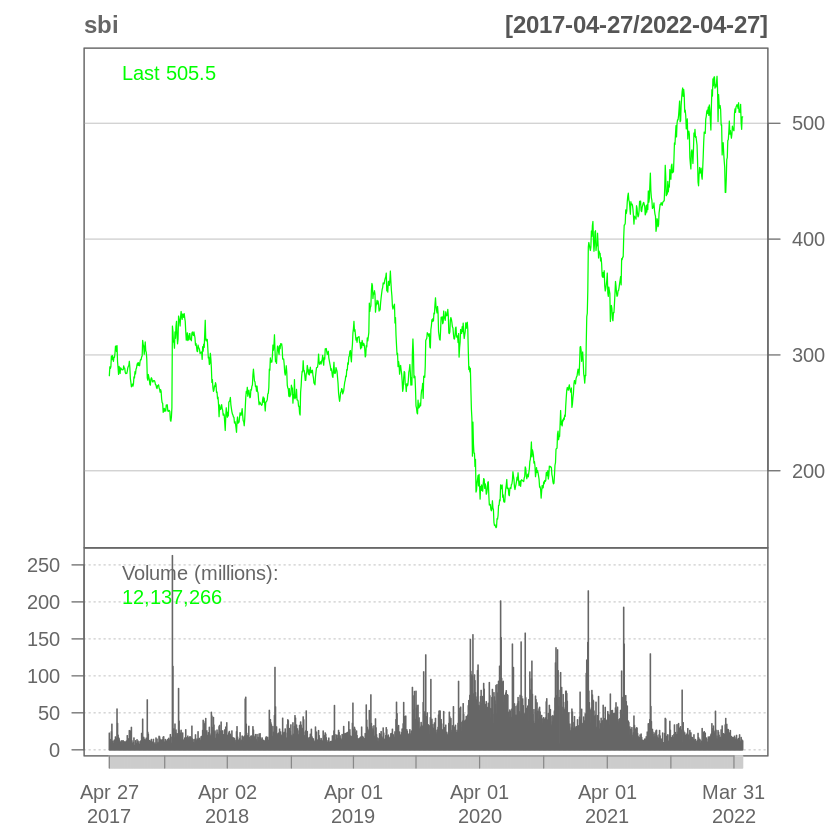

In [20]:
chartSeries(symbol,theme="white.mono",name="sbi",type = 'line', up.col = "green",dn.col="red")

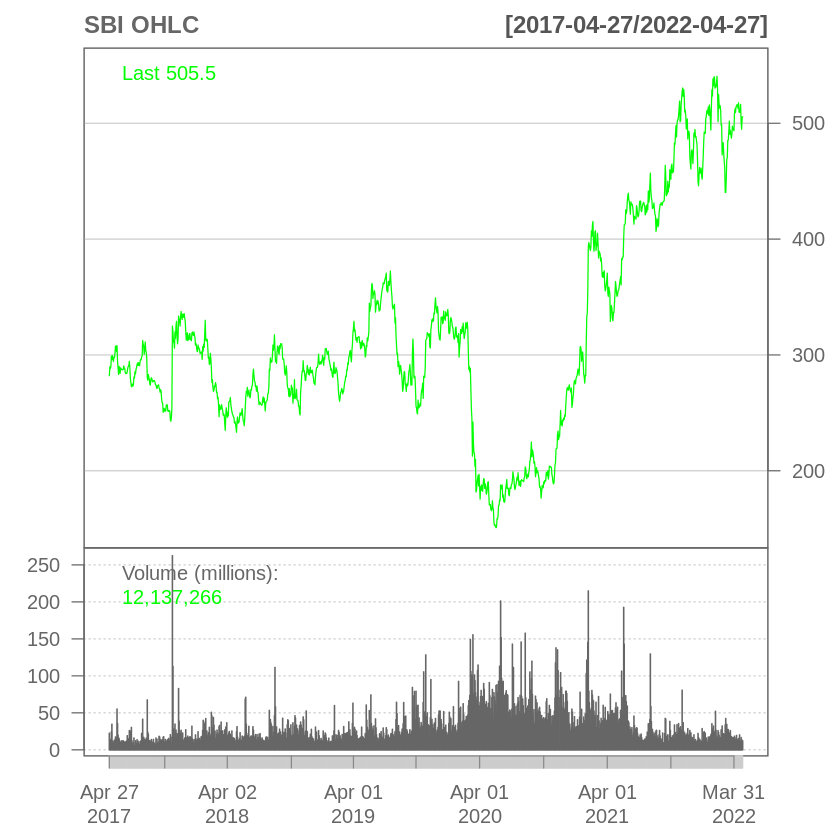

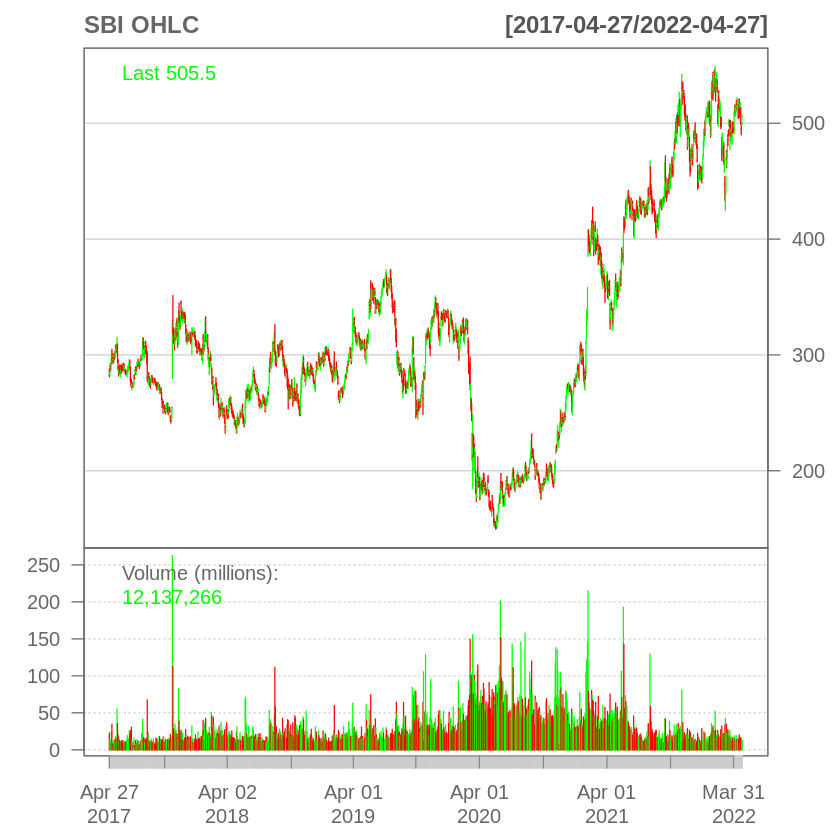

In [21]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="SBI OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="SBI OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="SBI OHLC", up.col = "green",dn.col="red")

In [22]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$SBIN.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"sbi_returns.csv",row.names=FALSE)

           SBIN.NS.Adjusted
2017-04-28      0.026934257
2017-05-02     -0.005016879
2017-05-03      0.005189333
2017-05-04      0.031419809
2017-05-05     -0.010251370
2017-05-08      0.011421056

In [23]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$SBIN.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 106.1115
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 03:40:27 2022 by user: 


In [24]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for SBI
jarqueberaTest(returns$SBIN.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 8302.853
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 03:40:32 2022 by user: 


In [25]:
# Now we do other tests for same data for cross check
shapiroTest(prices$SBIN.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.931
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 03:40:38 2022 by user: 


In [26]:
shapiroTest(returns$SBIN.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9152
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 03:40:43 2022 by user: 


In [27]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$SBIN.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$SBIN.NS.Adjusted
Dickey-Fuller = -1.703, Lag order = 10, p-value = 0.704
alternative hypothesis: stationary


In [28]:
adf.test(returns$SBIN.NS.Adjusted) 

Warning message in adf.test(returns$SBIN.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$SBIN.NS.Adjusted
Dickey-Fuller = -9.7119, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [29]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$SBIN.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.273  -3.457  -0.048   3.559  69.664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    0.0004267  0.0006164   0.692    0.489
z.diff.lag 0.0040836  0.0284965   0.143    0.886

Residual standard error: 7.06 on 1232 degrees of freedom
Multiple R-squared:  0.000413,	Adjusted R-squared:  -0.00121 
F-statistic: 0.2545 on 2 and 1232 DF,  p-value: 0.7753


Value of test-statistic is: 0.6923 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [30]:
summary(ur.df(returns$SBIN.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.142775 -0.011246  0.000393  0.012301  0.244432 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.98405    0.04052 -24.287   <2e-16 ***
z.diff.lag -0.02689    0.02849  -0.944    0.345    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02362 on 1231 degrees of freedom
Multiple R-squared:  0.506,	Adjusted R-squared:  0.5052 
F-statistic: 630.4 on 2 and 1231 DF,  p-value: < 2.2e-16


Value of test-statistic is: -24.2866 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [31]:
summary(ur.kpss(prices$SBIN.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 5.5023 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [32]:
summary(ur.kpss(returns$SBIN.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.1513 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


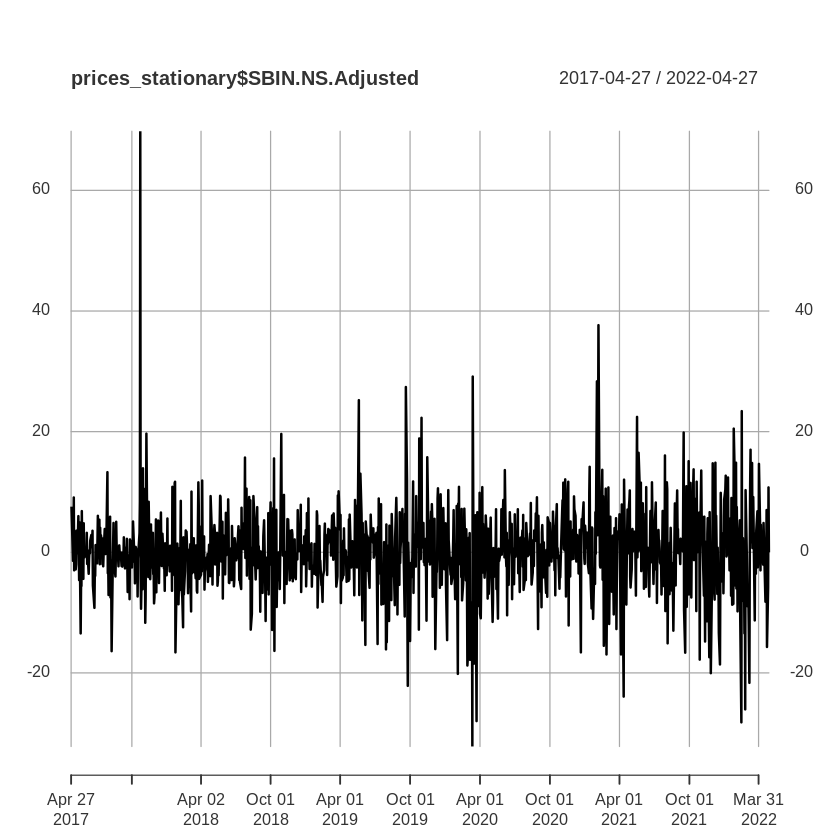

In [33]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$SBIN.NS.Adjusted)

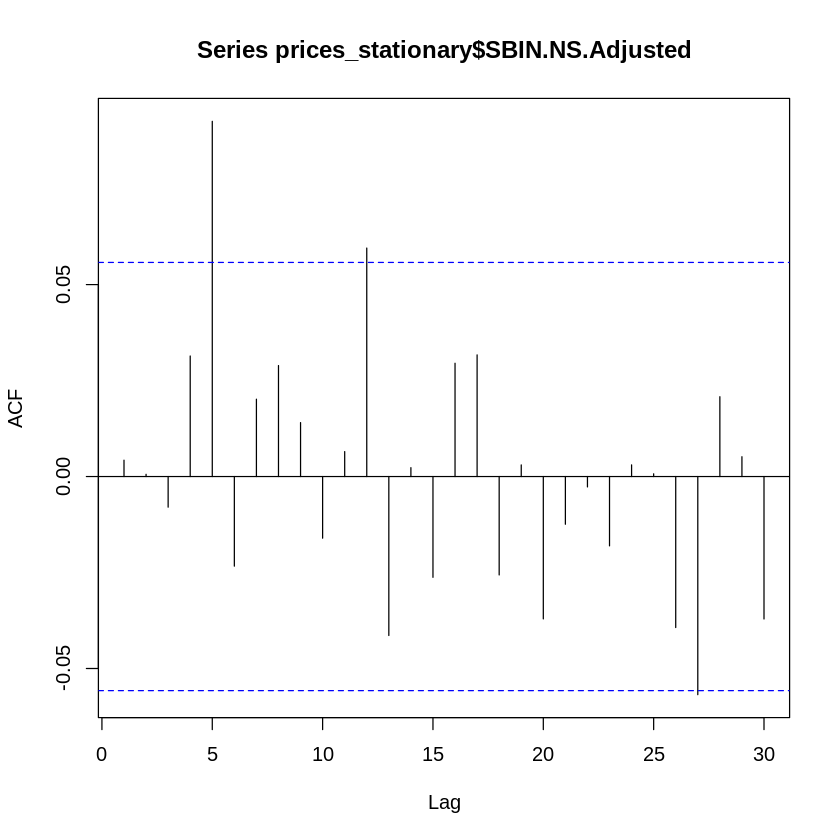

In [34]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$SBIN.NS.Adjusted)

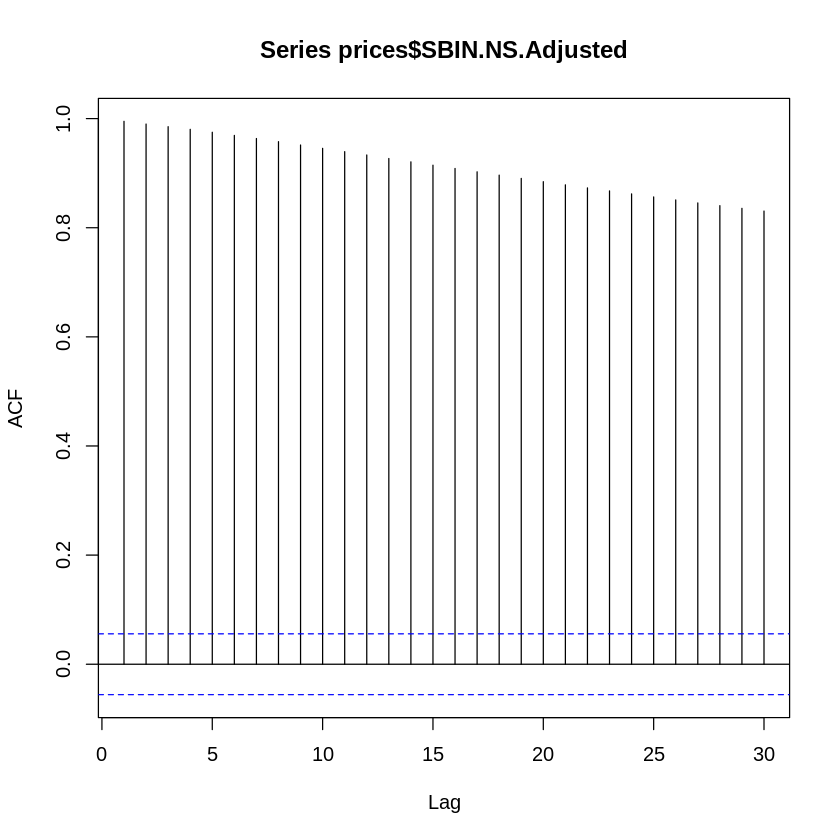

In [35]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$SBIN.NS.Adjusted)

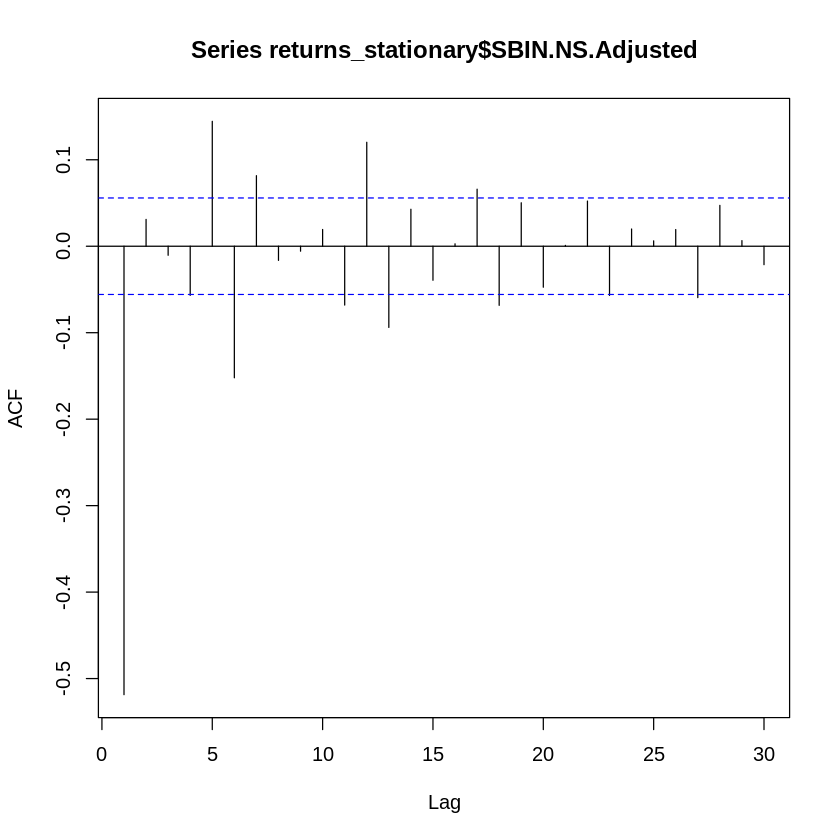

In [36]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$SBIN.NS.Adjusted)

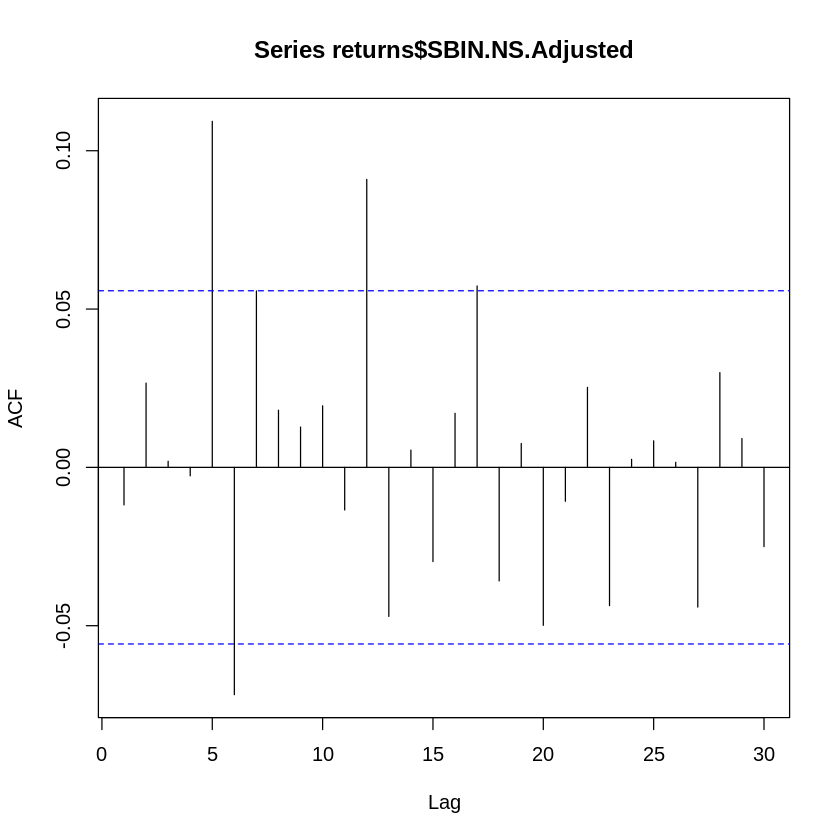

In [37]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$SBIN.NS.Adjusted)

In [38]:
# tests for auto-corelation
Box.test(prices_stationary$SBIN.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$SBIN.NS.Adjusted
X-squared = 11.959, df = 5, p-value = 0.03536


In [39]:
# for returns
Box.test(returns_stationary$SBIN.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$SBIN.NS.Adjusted
X-squared = 363.97, df = 5, p-value < 2.2e-16


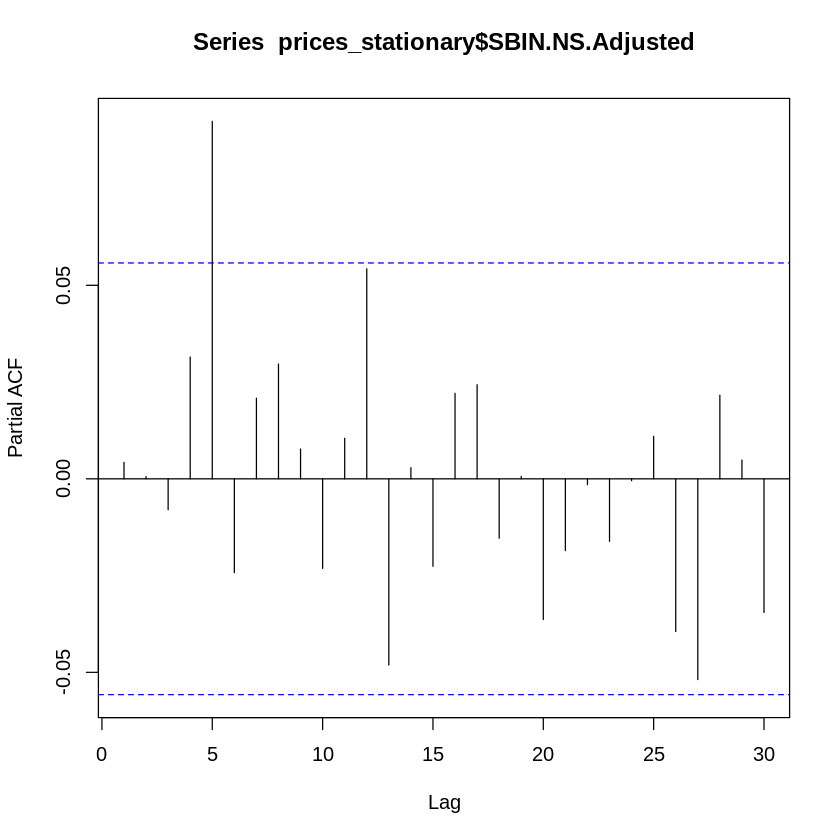

In [40]:
#PACF
pacf(prices_stationary$SBIN.NS.Adjusted)

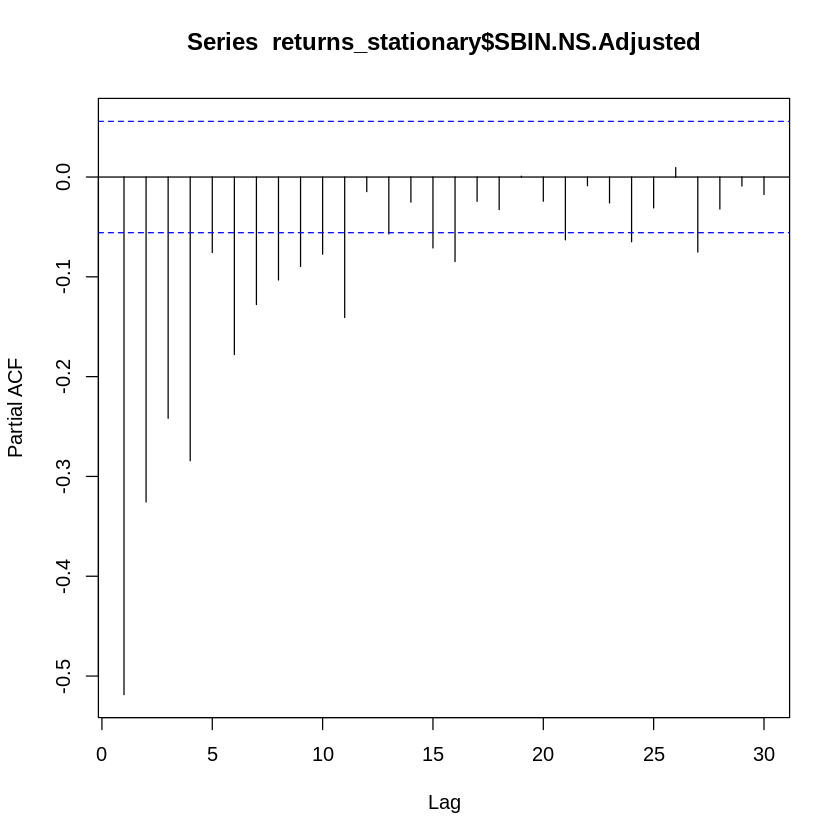

In [41]:
pacf(returns_stationary$SBIN.NS.Adjusted)

In [42]:
basicStats(prices)

,SBIN.NS.Adjusted
,<dbl>
nobs,1236.000000
NAs,0.000000
Minimum,149.470016
Maximum,540.549988
1. Quartile,261.126626
3. Quartile,351.182716
Mean,313.922655
Median,293.416031
Sum,388008.401606


In [43]:
BoxCox.lambda(prices$SBIN.NS.Adjusted)

[1] 0.7734779

In [44]:
# To make our data appear normal
prices_normal<-prices
prices_normal$SBI.NS.Adjusted<-forecast::BoxCox(prices$SBIN.NS.Adjusted, lambda = 0.781395366395601)
basicStats(prices_normal)

,SBIN.NS.Adjusted,SBI.NS.Adjusted
,<dbl>,<dbl>
nobs,1236.000000,1236.000000
NAs,0.000000,0.000000
Minimum,149.470016,62.740235
Maximum,540.549988,173.525479
1. Quartile,261.126626,97.722579
3. Quartile,351.182716,123.515162
Mean,313.922655,112.274968
Median,293.416031,107.165256
Sum,388008.401606,138771.860648


In [45]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$SBIN.NS.Adjusted)


[1] -0.9999242

In [46]:
returns_normal$SBI.NS.Adjusted<-forecast::BoxCox(returns$SBIN.NS.Adjusted, lambda = 1.99992424816297)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,SBIN.NS.Adjusted,SBI.NS.Adjusted
,<dbl>,<dbl>
nobs,1235.000000,1235.000000
NAs,0.000000,0.000000
Minimum,0.865380,-0.510473
Maximum,1.276872,-0.470146
1. Quartile,0.988785,-0.500083
3. Quartile,1.012464,-0.499942
Mean,1.000768,-0.499995
Median,1.000232,-0.500019
Sum,1235.948088,-617.493814


In [47]:
model<-auto.arima(prices$SBIN.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(0,1,0)  


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : Inf
 ARIMA(0,1,0) with drift         : 8330.182
 ARIMA(1,1,0) with drift         : 8332.074
 ARIMA(0,1,1) with drift         : 8332.169
 ARIMA(0,1,0)                    : 8329.025
 ARIMA(1,1,1) with drift         : 8334.085

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)                    : 8332.932

 Best model: ARIMA(0,1,0)                    



     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1237          505.5 496.4571 514.5429 491.6701 519.3299
1238          505.5 492.7114 518.2886 485.9415 525.0585
1239          505.5 489.8372 521.1628 481.5459 529.4541
1240          505.5 487.4142 523.5858 477.8402 533.1598
1241          505.5 485.2795 525.7205 474.5754 536.4246
1242          505.5 483.3495 527.6505 471.6238 539.3762
1243          505.5 481.5747 529.4253 468.9095 542.0905
1244          505.5 479.9228 531.0772 466.3831 544.6169
1245          505.5 478.3713 532.6287 464.0103 546.9897
1246          505.5 476.9039 534.0961 461.7660 549.2340

In [48]:
cor(prices)

,SBIN.NS.Adjusted
SBIN.NS.Adjusted,1


In [49]:
cor(returns)

,SBIN.NS.Adjusted
SBIN.NS.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 14.759, df = 10, p-value = 0.1411

Model df: 0.   Total lags used: 10



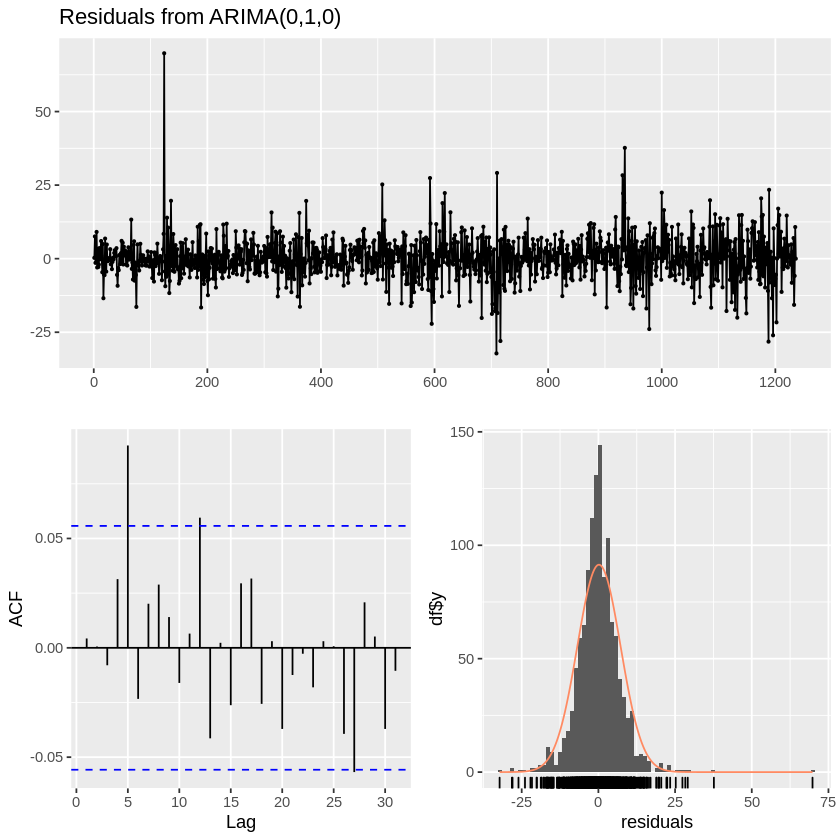

In [50]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [51]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1851229,7.053354,4.92997,0.02107822,1.627344,0.9992364,0.004265782


In [52]:
# Forecast for next day
fcast <- forecast(model, 30)
print(summary(fcast))
tail(prices)


Forecast method: ARIMA(0,1,0)

Model Information:
Series: prices$SBIN.NS.Adjusted 
ARIMA(0,1,0) 

sigma^2 = 49.79:  log likelihood = -4165.46
AIC=8332.93   AICc=8332.93   BIC=8338.05

Error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.1851229 7.053354 4.92997 0.02107822 1.627344 0.9992364
                    ACF1
Training set 0.004265782

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1237          505.5 496.4571 514.5429 491.6701 519.3299
1238          505.5 492.7114 518.2886 485.9415 525.0585
1239          505.5 489.8372 521.1628 481.5459 529.4541
1240          505.5 487.4142 523.5858 477.8402 533.1598
1241          505.5 485.2795 525.7205 474.5754 536.4246
1242          505.5 483.3495 527.6505 471.6238 539.3762
1243          505.5 481.5747 529.4253 468.9095 542.0905
1244          505.5 479.9228 531.0772 466.3831 544.6169
1245          505.5 478.3713 532.6287 464.0103 546.9897
1246          505.5 476.9039 534.0961

           SBIN.NS.Adjusted
2022-04-20           509.30
2022-04-21           516.30
2022-04-22           500.60
2022-04-25           494.75
2022-04-26           505.50
2022-04-27           505.50

[1] 1236

[1] 8.197067

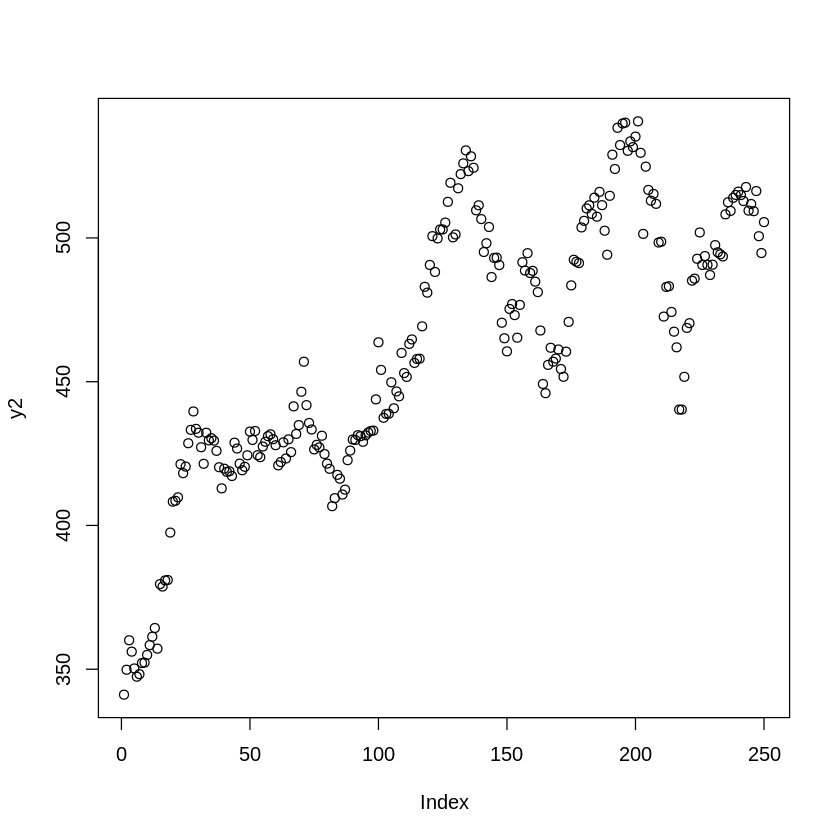

In [54]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 2201 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$SBIN.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$SBIN.NS.Adjusted,250)) 


[1] 1235

[1] 0.01766709

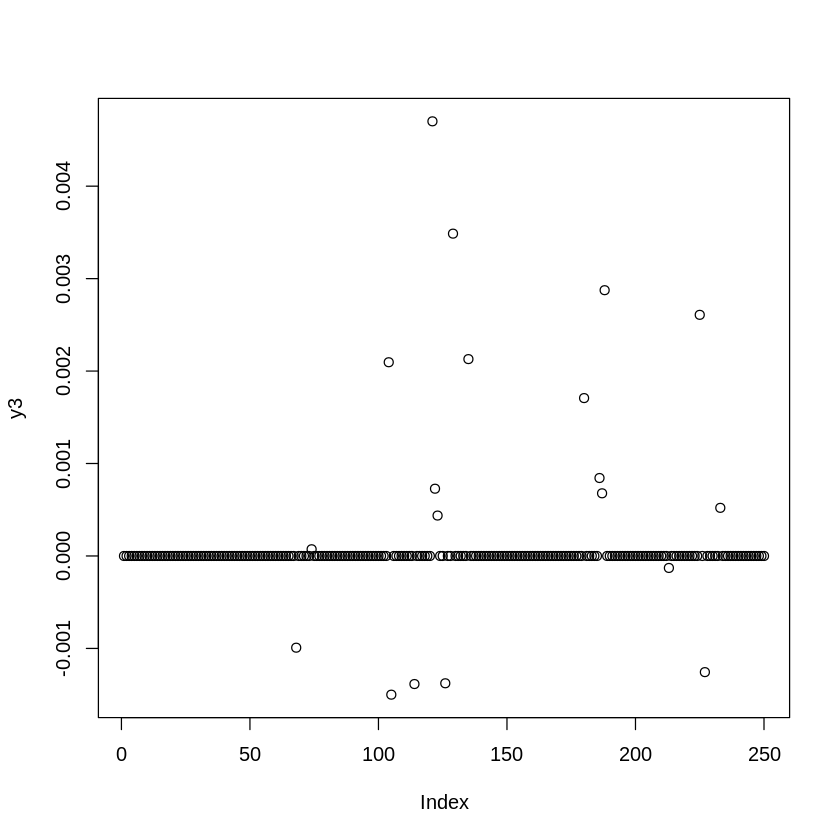

In [55]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$SBIN.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$SBIN.NS.Adjusted,250)) 